## Projeto 3 - Ciência dos Dados


**Integrantes:**  

Murilo Lima de Campos Menezes  
Enrico Venturini Costa  
Roberto Schnorrenberg  

## Projeto: Prevendo Valores Futuros de Ações 

   
    
    
   O intuito deste projeto é avaliar a capacidade de modelos de Redes Neurais de prever valores futuros de ações do mercado financeiro usando apenas valores anteriores.
    Nele, usaremos um tipo específico de Redes Neurais Recorrentes, o Long Short Term Memory (LSTM), e explicamos a seguir a razão desta escolha.


**As Redes Neurais Recorrentes (RNN)**

RNNs, diferentemente de Redes Neurais convencionais, são modelos compostos de neurônios interconectados que formam *loops* que dão ao modelo a capacidade de guardar em sua memória informações que serão usadas para computar futuras iterações. Este tipo de modelo foi criado em uma tentativa de abordar análises de sequência de modo que, em uma iteração, o modelo é capaz de gerar um output e aplicá-lo à  próxima iteração, assim criando um contexto para a próxima análise.  Deste modo, modelos RNN se tornam ótimos em interpretar sequências como, por exemplo,  uma frase incompleta como "*O nome da capital do Brasil é ...*" e usar o contexto das *features* anteriores, que neste caso são palavras, para prever a próxima.  
  Entretanto, quando colocadas para interpretar sequências com maior dependência temporal, como por exemplo a frase “*Os **garotos**, depois de  várias atividades durante o dia com pouco tempo de descanso, **estavam** exaustos*”, em que a conjugação verbal do verbo “estava”, no fim da frase, depende da pluralidade (ou singularidade) do sujeito, presente no início da frase, pôde-se perceber que RNNs não eram capazes de guardar esta dependência conforme a sequência de palavras aumentava, ou seja, apresentavam um problema de *vanishing gradient* e, então, uma nova abordagem foi apresentada: os *LSTM models*
  
**Modelos LSTM**

Assim como as RNNs, os LSTMs são capazes de guardar em sua memória informações a serem passadas para as próximas previsões, entretanto, não apresentam o problema de *vanishing gradient*, o que os permite interpretar longas sequências com alta dependência temporal, como por exemplo, o preço de ações no mercado financeiro, que são dependentes de seus valores anteriores, uma vez que, por exemplo, dependendo da ação, pode haver uma tendência de flutuação que se repete em uma época do ano durante vários anos.



## Análise das Ações

Com o tipo de modelo já escolhido, o próximo passo é determinar a ação que iremos usar para prever seus valores futuros



## Importando as bibliotecas necessárias

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import pandas_datareader as web

## Construindo o Dataset

In [877]:
ITUB4 = web.get_data_yahoo("ITUB4.SA",start="2001-01-02",end="2017-12-26")
VALE3 = web.get_data_yahoo("VALE3.SA",start="2001-01-02",end="2017-12-26")
PETR4 = web.get_data_yahoo("PETR4.SA",start="2001-01-02",end="2017-12-26")
WEGE3 = web.get_data_yahoo("WEGE3.SA",start="2001-01-02",end="2017-12-26")



DF1 = ITUB4.join(VALE3, how = 'inner', lsuffix = ': ITUB4', rsuffix = ': VALE3')
DF2 = PETR4.join(WEGE3, how = 'inner', lsuffix = ': PETR4', rsuffix = ': WEGE3')
dataset = DF1.join(DF2, how = 'inner')
dataset.head(10)


,High: ITUB4,Low: ITUB4,Open: ITUB4,Close: ITUB4,Volume: ITUB4,Adj Close: ITUB4,High: VALE3,Low: VALE3,Open: VALE3,Close: VALE3,...,Open: PETR4,Close: PETR4,Volume: PETR4,Adj Close: PETR4,High: WEGE3,Low: WEGE3,Open: WEGE3,Close: WEGE3,Volume: WEGE3,Adj Close: WEGE3
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-02,2.98026,2.90591,2.90608,2.96386,47010787.0,2.161765,3.60000,3.60000,3.60000,3.60000,...,5.72500,5.91250,32521600.0,4.132796,0.96154,0.46154,0.96154,0.46154,0.0,0.282328
2001-01-03,3.14600,2.94731,2.96386,3.07994,67061636.0,2.246431,3.83333,3.55833,3.58333,3.83333,...,5.88750,6.21250,60508800.0,4.342494,0.96154,0.46154,0.96154,0.46154,0.0,0.282328
2001-01-04,3.14600,3.09616,3.09616,3.12944,82788267.0,2.282535,3.83333,3.66667,3.83333,3.70833,...,6.21625,6.23750,46118400.0,4.359970,0.96154,0.46154,0.96154,0.46154,0.0,0.282328
2001-01-05,3.22879,3.04665,3.04665,3.14584,81568305.0,2.294497,3.66667,3.66667,3.66667,3.66667,...,6.25000,6.25000,41360000.0,4.368707,0.96154,0.46154,0.96154,0.46154,0.0,0.282328
2001-01-08,3.14600,3.07977,3.11289,3.07977,32069280.0,2.246307,3.66667,3.58333,3.66667,3.62500,...,6.25000,6.17375,35968000.0,4.315408,0.96154,0.46154,0.96154,0.46154,0.0,0.282328
2001-01-09,3.17912,3.07977,3.11289,3.09302,121066063.0,2.255972,3.66667,3.65833,3.66667,3.66667,...,6.25000,6.30375,43475200.0,4.406277,0.96154,0.46154,0.96154,0.46154,0.0,0.282328
2001-01-10,3.12944,3.07960,3.09467,3.12116,110207199.0,2.276496,3.66667,3.62500,3.70833,3.66583,...,6.28750,6.27500,39264000.0,4.386181,0.96154,0.46154,0.96154,0.46154,0.0,0.282328
2001-01-11,3.14600,3.06321,3.14418,3.12944,61589929.0,2.282535,3.66667,3.60000,3.66667,3.60417,...,6.26250,6.35000,34508800.0,4.438607,0.96154,0.46154,0.96154,0.46154,0.0,0.282328
2001-01-12,3.12944,3.04665,3.12944,3.08010,49788917.0,2.246549,3.70833,3.58333,3.70833,3.58333,...,6.38125,6.38750,38777600.0,4.464818,0.96154,0.46154,0.96154,0.46154,0.0,0.282328


## Comportamento das Ações e do Ibovespa

In [4]:
Close_ITUB4 = dataset["Adj Close: ITUB4"]
Close_VALE3 = dataset["Adj Close: VALE3"]
Close_PETR4 = dataset["Adj Close: PETR4"]
Close_WEGE3 = dataset["Adj Close: WEGE3"]

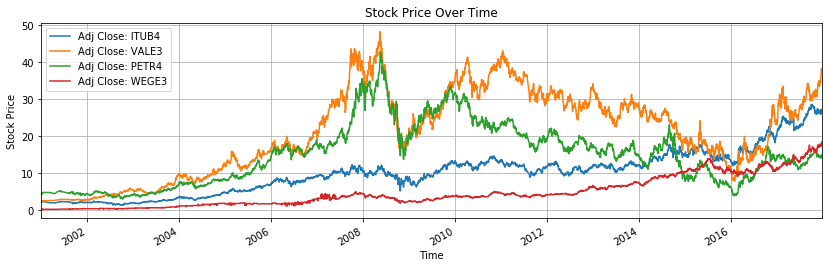

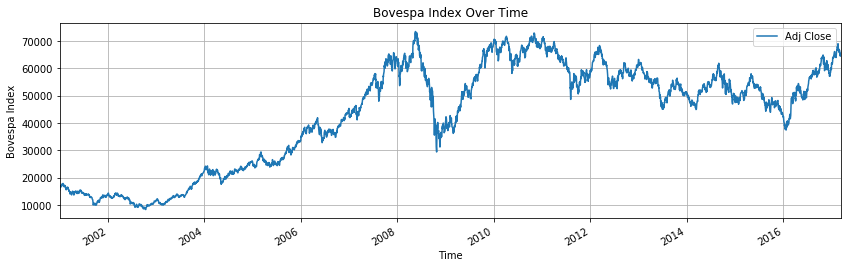

In [879]:
C = [Close_ITUB4, Close_VALE3, Close_PETR4, Close_WEGE3]

for i in C:
    i.plot(figsize=(14, 4))

plt.grid(True)
plt.legend()
plt.ylabel("Stock Price")
plt.xlabel("Time")
plt.title("Stock Price Over Time")
plt.show()

Close_bovespa = web.get_data_yahoo('^BVSP',start="2001-01-02",end="2017-03-13")['Adj Close']
Close_bovespa.plot(figsize=(14,4))
plt.grid(True)
plt.legend()
plt.ylabel("Bovespa Index")
plt.xlabel("Time")
plt.title("Bovespa Index Over Time")
plt.show()

**Análise**  
Das ações escolhidas, podemos notar que a VALE3 e a PETR4 tendem a acompanhar fortemente o indice bovespa, o que não é interessante para nós, uma vez que indica uma influência de fatores externos e, como a nossa proposta é prever o valor futuro da ação utilizando apenas os valores anteriores, uma acão como a ITUB4 se torna mais atraente, pois o gráfico indica que esta é mais estável que as outras, tornando a série temporal menos complexa de se prever.

## Análise ITUB4

**Stock Price over Time**

Text(0.5, 1.0, 'Stock Price Over Time')

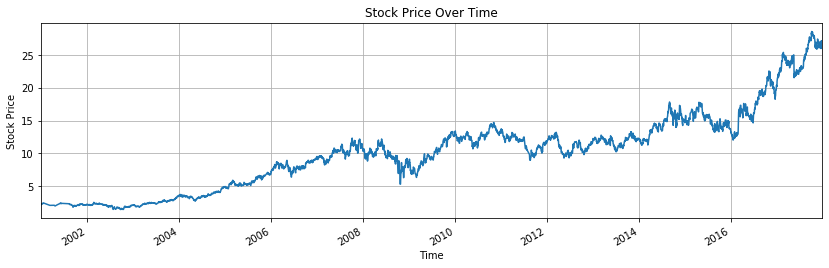

In [887]:
plt.figure(figsize=(14,4))
Close_ITUB4.plot()
plt.grid(True)
plt.ylabel("Stock Price")
plt.xlabel("Time")
plt.title("Stock Price Over Time")



**2017 Daily Return**


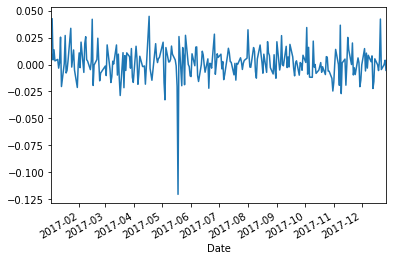

In [8]:
ITUB42017 = Close_ITUB4.tail(252)
DR2017 = ITUB42017.pct_change(1)
DR2017.plot()



**Correlação ITUB4 e Ibovespa**

Ajuste linear entre X3 e X4:
Coeficiente linear: 0.9112131498559837
Coeficiente angular: 0.00021929132359216826


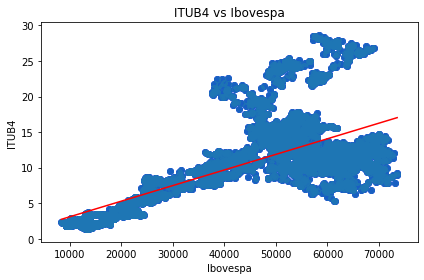

In [9]:
plt.scatter(Close_bovespa,Close_ITUB4,color="blue")
def reta(dados_x, dados_y):    
    a = dados_x.cov(dados_y) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
    plt.scatter(dados_x, dados_y, alpha=0.8)
    plt.title('ITUB4 vs Ibovespa')
    plt.xlabel('Ibovespa')
    plt.ylabel('ITUB4')

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color="red")

    plt.tight_layout()
    
reta(Close_bovespa,Close_ITUB4)

In [10]:
print("Coeficiente de correlação: {}".format(Close_bovespa.corr(Close_ITUB4)))

Coeficiente de correlação: 0.8497349968894575


A variação de preço da ação ITUB4 apresenta forte correlação linear positiva com a variação do indice bovespa, uma vez que o coeficiente de correlação linear entre as duas é igual a 0.8497349968894575 mas, gráficamente, pode-se interpretar que isso diz respeito apenas ao crescimento contínuo da ação que acompanha o índice, diferentemente de VALE3 e PETR4 que tendem a acompanhar o índice dia-após-dia.

## Construindo o Modelo

Com a ação escolhida, seguimos para a construção da primeira iteração modelo que tentará prever o valor de uma ação em uma dia no futuro usando os valores dos ultimos 60 dias.




**Importando as Bibliotecas Necessárias**

In [888]:
import tensorflow as tf 
import numpy as np 


print(tf.__version__) # Para ter certeza que estamos rodando tensorflow 2.0 

2.0.0


## Determinando o Dataset de Treinamento do Modelo

In [891]:
dataset = web.get_data_yahoo("ITUB4.SA",start="2001-01-01",end="2014-12-31").drop(['High','Low','Open','Close','Volume'],axis=1)
dataset.head(5)

,Adj Close
Date,
2001-01-02,2.161765
2001-01-03,2.246431
2001-01-04,2.282535
2001-01-05,2.294497
2001-01-08,2.246307


## Normalizacão dos Datasets

Para o bom desempenho do modelo, é necessário que seja feito um bom tratamento do dataset. 
Não vamos entrar em muitos detalhes, mas é provado matematicamente que a normalização de datasets ajuda na convergência do modelo, facilitando para que este encontre mais facilmente pontos de máximo e mínimo locais e globais, além de acelerar o tempo de treinamento. Para o nosso modelo, usaremos o metodo de *Min-Max Scaling*.

**Min-Max Scaling**  

Uma vez que os dados selecionados apresentam atributos de grande magnitude, a normalização através do método escolhido reduz a variação, que anteriormente poderia ser de dezenas de reais, em um *range* de 0 a 1, o que diminui a complexidade da tarefa que o modelo deve executar, melhorando assim o seu desempenho.  

Para isso, usaremos a função MinMaxScaler da biblioteca Scikit-Learn.



In [425]:
from sklearn.preprocessing import MinMaxScaler

In [426]:
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)
dataset

array([[0.04629899],
       [0.05145112],
       [0.05364811],
       ...,
       [0.82995449],
       [0.83258659],
       [0.82731635]])

Vale Notar também que, enquanto o input da função scaler é um dataset, o output é um *numpy array*, o que ja facilita bastante o nosso trabalho.

## Vetorização do Input e Output

A vetorização do Input e Output é uma das partes mais importantes e, talvez, mais complexas da implementação do modelo.  
Naturalmente, uma rede LSTM espera que o input passado a ela seja um vetor tridimensional em que suas dimensões são o **batch_size**, o **time_step** ou **lag**, e **input_dim**, como mostra a figura a seguir:

![title](lstmvector.png)

## As três dimensões do Input

**batch_size:**  O *batch size*, como o nome diz, é o "tamanho do lote", ou no nosso caso, o número de acões disponiveis para treinamento e validação, em que cada unidade representa o valor de fechamento em cada dia de mercado finaceiro entre o inicio de 2001 e o fim de 2014, totalizando 3373 valores.  

**time_step** ou **lag**: o *time step* representa a quantidade de dias no passado que queremos que o modelo analise para realizar a sua previsão do valor da ação no dia seguinte, ou seja, para cada valor que o modelo deve prever, ele irá analisar o valor de fechamento nos dias anteriores que serão determinados pela variável *time step*. No nosso caso, queremos que o modelo analise 60 dias passados para prever um valor futuro, então este numero será igual a 60. 

**input_dim**: O *input dim*, ou *input dimension*, representa o numero de unidades a serem analisadas em uma única sequência de input. Como no nosso caso o modelo ira analisar apenas um valor por dia, este numero será igual a 1.

## O output

Como o nosso objetivo nesta iteração é prever apenas um valor futuro, o vetor de output a ser passado para o modelo deve ser de apenas uma dimensão, que se resume também ao número de ações entre 2001 e 2014: 3373. 



In [399]:
X_train2 = []
Y_train2 = []

for i in range(60,dataset.shape[0]):
    X_train2.append(dataset[i-60:i])
    Y_train2.append(dataset[i,0])
    
    
X_train2 = np.array(X_train2)
Y_train2 = np.array(Y_train2)


print("Shape de X_train2: {}".format(X_train2.shape))
print("Shape de Y_train2: {}".format(Y_train2.shape))

Shape de X_train2: (3373, 60, 1)
Shape de Y_train2: (3373,)


## Diagrama para melhor visualização do procedimento

![](vectorviz.png)


Como o diagrama mostra, essencialmente, o código implementado abre o vetor "dataset", pega os valores do dia 1 ao dia 60 e adiciona-os ao vetor de input, e então pega o valor seguinte( valor do dia 61) e adiciona-o ao vetor de output. Em seguida, o código pula um dia, ou seja, passa para o segundo dia, e repete o processo, adicionando o valor do dia 62 ao vetor de output e repete essa rotina 3373 vezes, que é o número de valores que ele,em tese, deve prever.

## O modelo

Normalmente, Machine Learning tende a ser um processo muito empírico e essa ideia foi fortalecida no processo de construção do nosso modelo. Iniciamos com um modelo simples de apenas 3 camadas, consistindo de 2 LSTM layers para o input e um Dense layer para o output, usando Adam optimizer com o learning rate default da documentação do keras , que é uma biblioteca de machine learning e 50 épocas de treinamento e, em seguida, rodamos o código para analisar o desempenho.
Como esperado, o desempenho não foi muito bom, apresentando um underfitting do nosso modelo, que significa que este não conseguiu aprender muito bem a sequência de valores passados e, assim, mudamos sua arquitetura.
O processo foi longo (por conta do tempo de treinamento e as inúmeras arquiteturas testadas) mas enfim chegamos à arquitetura que apresentou o melhor desempenho.  

Resumidamente, esta arquitetura consiste de uma camada LSTM com 60 celulas de memória que recebe o input e retorna uma previsão, seguido de uma camada de Dropout, que usa um método probabilistico para excluir 15% do output à fim de evitar overfitting e melhorar a performance do modelo. 

Em seguida, o output gerado pela camada LSTM anterior é passado para a próxima camada de LSTM igual à primeira, carregando as informações aprendidas a fim de interpretar a dependência temporal entre os valores de ações e, de novo, o output gerado por esta camada passa por uma nova camada de Dropout igual à primeira. 

Este processo entao é realizado mais uma vez e, em seguida, o output gerado é passado para uma camada Dense, que passa este output para os seus 60 neurônios, treina,  e estes neurônios geram novos outputs a serem passados para mais uma camada Dense de 30 neurônios que, por sua vez, re-treina e os neurônios passam os seus outputs para a última camada Dense de apenas 1 neurônio que realiza a previsão final. Este último processo de 3 camadas Dense tem a finalidade de aumentar a complexidade do modelo, a fim de melhorar a sua convergência e performance geral.

É importante dizer que o nosso modelo separa automaticamente 1/3 do dataset de treinamento para validação através do argumento *validation_split* passado à função *model.fit* que treina o modelo.

Foram testados diferentes números de épocas de treinamento e obtivemos o melhor desempenho com 100 épocas.

In [412]:
model2 = tf.keras.Sequential()

model2.add(tf.keras.layers.LSTM(60,input_shape=(60,1), return_sequences=True))
model2.add(tf.keras.layers.Dropout(0.15))

model2.add(tf.keras.layers.LSTM(60,return_sequences=True))
model2.add(tf.keras.layers.Dropout(0.15))

model2.add(tf.keras.layers.LSTM(60))
model2.add(tf.keras.layers.Dropout(0.15))

model2.add(tf.keras.layers.Dense(60))

model2.add(tf.keras.layers.Dense(30))

model2.add(tf.keras.layers.Dense(1))

adam = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)


model2.compile(optimizer=adam, loss="mean_squared_error")
model2.summary()
history2 = model2.fit(X_train2,Y_train2, epochs=100,validation_split=0.33)


Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_106 (LSTM)              (None, 60, 60)            14880     
_________________________________________________________________
dropout_100 (Dropout)        (None, 60, 60)            0         
_________________________________________________________________
lstm_107 (LSTM)              (None, 60, 60)            29040     
_________________________________________________________________
dropout_101 (Dropout)        (None, 60, 60)            0         
_________________________________________________________________
lstm_108 (LSTM)              (None, 60)                29040     
_________________________________________________________________
dropout_102 (Dropout)        (None, 60)                0         
_________________________________________________________________
dense_83 (Dense)             (None, 60)              

Epoch 60/100
2259/2259 [==============================] - 7s 3ms/sample - loss: 4.7444e-04 - val_loss: 2.6411e-04
Epoch 61/100
2259/2259 [==============================] - 7s 3ms/sample - loss: 4.9376e-04 - val_loss: 3.6357e-04
Epoch 62/100
2259/2259 [==============================] - 7s 3ms/sample - loss: 4.6093e-04 - val_loss: 2.5213e-04
Epoch 63/100
2259/2259 [==============================] - 7s 3ms/sample - loss: 4.4645e-04 - val_loss: 2.4399e-04
Epoch 64/100
2259/2259 [==============================] - 7s 3ms/sample - loss: 5.0677e-04 - val_loss: 3.3587e-04
Epoch 65/100
2259/2259 [==============================] - 7s 3ms/sample - loss: 4.8531e-04 - val_loss: 3.3536e-04
Epoch 66/100
2259/2259 [==============================] - 7s 3ms/sample - loss: 4.4254e-04 - val_loss: 6.3944e-04
Epoch 67/100
2259/2259 [==============================] - 7s 3ms/sample - loss: 4.5120e-04 - val_loss: 3.3911e-04
Epoch 68/100
2259/2259 [==============================] - 7s 3ms/sample - loss: 4.7224e-

**Diagnóstico do Modelo**

Em seguida, um gráfico comparando o *Mean Squared Error* de treinamento e validação é plotado, à fim de avaliarmos o desempenho do modelo e verificar se não ocorreu overfitting ou underfitting, que significa que o modelo teve um bom desempenho durante o treinamento mas um mau desempenho na validação, ou não conseguiu aprender muito bem a sequência durante o teste, respectivamente.

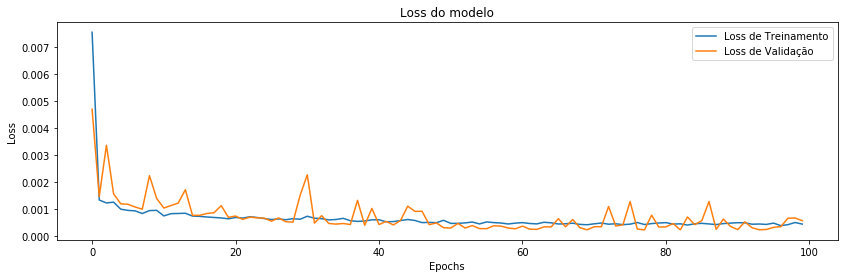

In [413]:
plt.figure(figsize=(14,4))
plt.plot(history2.history["loss"], label="Loss de Treinamento")
plt.plot(history2.history["val_loss"], label = "Loss de Validação")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


plt.title("Loss do modelo")
plt.show()

O gráfico nos mostra que o Loss de Validação acompanhou o Loss de treinamento durante as épocas de treinamento, o que nos indica que o modelo teve um bom desempenho em ambos.

## Primeira Previsão

**Normalização do dataset de previsão**

Para a primeira previsão, usamos a API da Yahoo Finance mais uma vez para puxar um dataset de valores entre dezembro de 2014 e dezembro de 2015 e realizamos a normalização dos valores mais uma vez.

In [414]:
pset = web.get_data_yahoo("ITUB4.SA",start="2014-12-01",end="2015-12-01").drop(['High','Low','Open','Close','Volume'],axis=1)
pset = scaler.fit_transform(pset)

## Vetorização do Input e do Output de validação 

O processo de vetorização para a previsão é o mesmo usado no treinamento, mas Py não será utilizado no modelo, apenas na comparação dos resultados.

In [415]:
Px = []
Py = []

for i in range(60, pset.shape[0]):
    Px.append(pset[i-60:i])
    Py.append(pset[i])
    
Px = np.array(Px)
Py = np.array(Py)





print("Shape de Px: {}".format(Px.shape))
print("Shape de Py: {}".format(Py.shape))

Shape de Px: (188, 60, 1)
Shape de Py: (188, 1)


## Previsão e Desnormalização dos Outputs

Em seguida, a função model.predict é chamada com o input de previsão Px, que gera um output para cada 60 dias analisados e usamos a função inverse_transform para desnormalizar o output e o Py, que é o vetor que utilizaremos para comparar os resultados.

In [416]:
prediction3 = model2.predict(Px)

p3Scaled = scaler.inverse_transform(prediction3)
pyScaled = scaler.inverse_transform(Py)

[16.53632] [16.63093758]
(188, 1)


**Visualização dos Resultados**

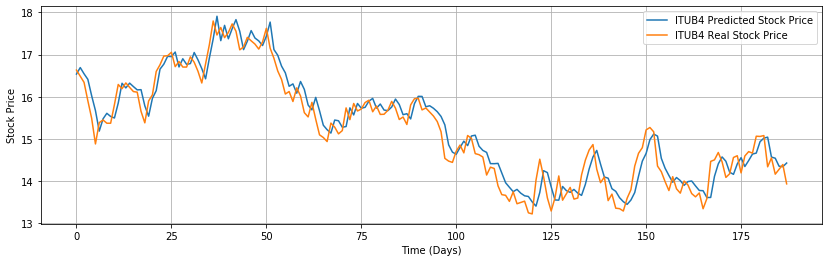

In [417]:
plt.figure(figsize=(14,4))

plt.plot(p3Scaled,label="ITUB4 Predicted Stock Price")
plt.plot(pyScaled,label="ITUB4 Real Stock Price")
plt.ylabel("Stock Price")
plt.xlabel("Time (Days)")
plt.legend()
plt.grid(True)

À partir do gráfico, podemos notar que o modelo teve um bom desempenho nesta primeira iteração, sendo capaz de prever o valor de um dia futuro analisando 60 dias anteriores com boa precisão.

**Diminuição do Espaço de Tempo de Previsão**

Para melhor visualização, montamos então um dataset menor, à fim de analisar o desempenho em apenas 30 dias.

In [418]:
limt = web.get_data_yahoo('ITUB4.SA',start='2014-12-01',end='2015-04-20').drop(['High','Low','Open','Close','Volume'],axis=1)

**Normalização**

In [419]:
scaledlimt = scaler.fit_transform(limt)
scaledlimt.shape[0]

94

**Vetorização**

In [420]:
X_limt = []
Y_limt = []

for i in range(60,scaledlimt.shape[0]):
    X_limt.append(scaledlimt[i-60:i])
    Y_limt.append(scaledlimt[i])
    
X_limt, Y_limt = np.array(X_limt),np.array(Y_limt)

print("Shape de X_limt: {}".format(X_limt.shape))
print("Shape de Y_limt: {}".format(Y_limt.shape))

Shape de X_limt: (34, 60, 1)
Shape de Y_limt: (34, 1)


**Previsão**

In [433]:
prediction4 = model2.predict(X_limt)

**Desnormalização**

In [434]:
prediction4 = scaler.inverse_transform(prediction4)
Y_real = scaler.inverse_transform(Y_limt)

**Visualização da Previsão**

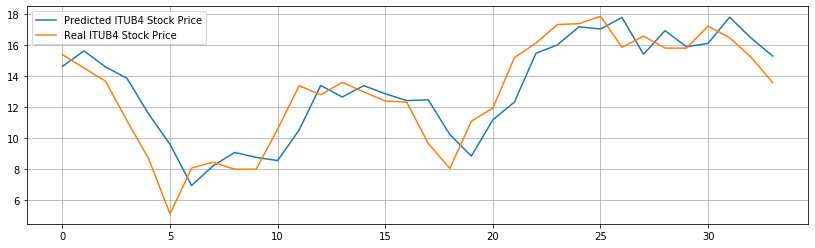

In [437]:
plt.figure(figsize=(14,4))
plt.plot(prediction4,label="Predicted ITUB4 Stock Price")
plt.plot(Y_real,label="Real ITUB4 Stock Price")
plt.legend()
plt.grid(True)

## Prevendo 10 Dias no Futuro

Para esta iteração, usaremos o método Direct Strategy, que consiste em gerar 10 modelos para tentar prever 10 dias no futuro analisando os mesmos 60 dias, como mostra o diagrama a seguir:  

![title](vectorviz2.png)


Diferentemente da primeira iteração, o código de vetorização desta iteração é dinâmico, de modo que, para prever o primeiro dia, ele será igual ao modelo da primeira iteração, mas, para prever o segundo dia, ele seleciona os mesmos 60 dias analizados para prever o primeiro dia e adiciona-os ao vetor de input, e então pega o valor de dois dias depois e adiciona-o ao vetor de output , e então repete este processo até chegar em 10 outputs.

In [700]:
import random as random

Criamos então uma função que automatiza todo o processo de vetorização e treinamento do modelo.

In [652]:
def create_model(k,n=10,num_epochs=5):
    X_train = []
    Y_train = []

    for i in range(60,dataset.shape[0]-n):
        X_train.append(dataset[i-60:i])
        Y_train.append(dataset[i+k,0])
    
    X_train = np.array(X_train)
    Y_train = np.array(Y_train)
    
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.LSTM(60,input_shape=(60,1), return_sequences=True))
    model.add(tf.keras.layers.Dropout(0.15))

    model.add(tf.keras.layers.LSTM(60,return_sequences=True))
    model.add(tf.keras.layers.Dropout(0.15))

    model.add(tf.keras.layers.LSTM(60))
    model.add(tf.keras.layers.Dropout(0.15))

    model.add(tf.keras.layers.Dense(60))

    model.add(tf.keras.layers.Dense(30))

    model.add(tf.keras.layers.Dense(1))

    adam = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

    model.compile(optimizer=adam, loss="mean_squared_error")
    model.summary()
        
    history = model.fit(X_train, Y_train, epochs=num_epochs, validation_split=0.33)
    
    return (history,model)

Em seguida rodamos então a função criada na célula anterior e prendemos o modelo na variável *model* que é adicionada à uma lista *M_model* para cada iteração de treinamento.

In [722]:
# Esta celula leva em torno de 4h para rodar e treinar todos os modelos. Tome Cuidado.
M_history = []
M_model = []
for k in range(0,10):
    history , model = create_model(k,num_epochs=200)
    M_history.append(history)
    M_model.append(model)
    

Model: "sequential_91"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_234 (LSTM)              (None, 60, 60)            14880     
_________________________________________________________________
dropout_227 (Dropout)        (None, 60, 60)            0         
_________________________________________________________________
lstm_235 (LSTM)              (None, 60, 60)            29040     
_________________________________________________________________
dropout_228 (Dropout)        (None, 60, 60)            0         
_________________________________________________________________
lstm_236 (LSTM)              (None, 60)                29040     
_________________________________________________________________
dropout_229 (Dropout)        (None, 60)                0         
_________________________________________________________________
dense_188 (Dense)            (None, 60)              

Epoch 131/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 3.5202e-04 - val_loss: 2.2042e-04
Epoch 132/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 3.6439e-04 - val_loss: 2.2086e-04
Epoch 133/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 4.1217e-04 - val_loss: 5.3361e-04
Epoch 134/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 3.8150e-04 - val_loss: 2.2577e-04
Epoch 135/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 4.2055e-04 - val_loss: 3.3016e-04
Epoch 136/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 4.0817e-04 - val_loss: 2.7049e-04
Epoch 137/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 3.7118e-04 - val_loss: 2.1782e-04
Epoch 138/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 3.9121e-04 - val_loss: 2.1863e-04
Epoch 139/200
2253/2253 [==============================] - 7s 3ms/sample - loss:

2253/2253 [==============================] - 14s 6ms/sample - loss: 0.0070 - val_loss: 0.0019
Epoch 2/200
2253/2253 [==============================] - 8s 3ms/sample - loss: 0.0015 - val_loss: 0.0023
Epoch 3/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0014 - val_loss: 0.0015
Epoch 4/200
2253/2253 [==============================] - 8s 3ms/sample - loss: 0.0012 - val_loss: 0.0017
Epoch 5/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0011 - val_loss: 0.0027
Epoch 6/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0011 - val_loss: 0.0013
Epoch 7/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 9.5430e-04 - val_loss: 0.0028
Epoch 8/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 9.7141e-04 - val_loss: 0.0017
Epoch 9/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 9.7158e-04 - val_loss: 0.0012
Epoch 10/200
2253/2253 [==============================

2253/2253 [==============================] - 7s 3ms/sample - loss: 5.4237e-04 - val_loss: 6.4044e-04
Epoch 147/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 5.6988e-04 - val_loss: 4.4092e-04
Epoch 148/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 5.2873e-04 - val_loss: 0.0015
Epoch 149/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 5.5595e-04 - val_loss: 6.2659e-04
Epoch 150/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 5.0606e-04 - val_loss: 6.4101e-04
Epoch 151/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 5.1063e-04 - val_loss: 6.1170e-04
Epoch 152/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 5.3405e-04 - val_loss: 4.2843e-04
Epoch 153/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 5.1349e-04 - val_loss: 5.2016e-04
Epoch 154/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 6.0272e-04 - val_

2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0013 - val_loss: 0.0019
Epoch 5/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0011 - val_loss: 0.0016
Epoch 6/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0010 - val_loss: 0.0014
Epoch 7/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0011 - val_loss: 0.0015
Epoch 8/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0010 - val_loss: 0.0014
Epoch 9/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0011 - val_loss: 0.0013
Epoch 10/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0011 - val_loss: 0.0023
Epoch 11/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0010 - val_loss: 0.0016
Epoch 12/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 9.9853e-04 - val_loss: 0.0018
Epoch 13/200
2253/2253 [==============================] - 7s

2253/2253 [==============================] - 7s 3ms/sample - loss: 7.1063e-04 - val_loss: 0.0018
Epoch 151/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 6.2851e-04 - val_loss: 0.0014
Epoch 152/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 7.0532e-04 - val_loss: 6.5517e-04
Epoch 153/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 6.6011e-04 - val_loss: 7.0044e-04
Epoch 154/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 6.3665e-04 - val_loss: 6.6419e-04
Epoch 155/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 6.2711e-04 - val_loss: 6.3392e-04
Epoch 156/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 6.1646e-04 - val_loss: 7.0084e-04
Epoch 157/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 6.5116e-04 - val_loss: 8.0083e-04
Epoch 158/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 6.7074e-04 - val_loss

2253/2253 [==============================] - 7s 3ms/sample - loss: 7.4090e-04 - val_loss: 0.0010
Epoch 83/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 7.7399e-04 - val_loss: 0.0017
Epoch 84/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 8.4496e-04 - val_loss: 0.0015
Epoch 85/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 7.9346e-04 - val_loss: 0.0011
Epoch 86/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 7.6040e-04 - val_loss: 9.6148e-04
Epoch 87/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 7.5870e-04 - val_loss: 0.0010
Epoch 88/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 8.4541e-04 - val_loss: 8.9078e-04
Epoch 89/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 7.3813e-04 - val_loss: 8.7658e-04
Epoch 90/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 7.9324e-04 - val_loss: 9.5387e-04
Epoch 9

Epoch 155/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 7.8053e-04 - val_loss: 9.7224e-04
Epoch 156/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 7.5699e-04 - val_loss: 8.3322e-04
Epoch 157/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 8.2792e-04 - val_loss: 0.0013
Epoch 158/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 7.5075e-04 - val_loss: 9.6579e-04
Epoch 159/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 7.4039e-04 - val_loss: 9.5648e-04
Epoch 160/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 7.5010e-04 - val_loss: 8.1942e-04
Epoch 161/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 7.0792e-04 - val_loss: 0.0010
Epoch 162/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 7.1274e-04 - val_loss: 0.0011
Epoch 163/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 7.1459e-04 

Epoch 14/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0011 - val_loss: 0.0040
Epoch 15/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0010 - val_loss: 0.0015
Epoch 16/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0010 - val_loss: 0.0017
Epoch 17/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0010 - val_loss: 0.0016
Epoch 18/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0010 - val_loss: 0.0015
Epoch 19/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0011 - val_loss: 0.0022
Epoch 20/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0011 - val_loss: 0.0019
Epoch 21/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0010 - val_loss: 0.0017
Epoch 22/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0010 - val_loss: 0.0014
Epoch 23/200
2253/2253 [======================

2253/2253 [==============================] - 8s 4ms/sample - loss: 8.5294e-04 - val_loss: 0.0014
Epoch 164/200
2253/2253 [==============================] - 8s 4ms/sample - loss: 8.2268e-04 - val_loss: 0.0015
Epoch 165/200
2253/2253 [==============================] - 8s 3ms/sample - loss: 7.8906e-04 - val_loss: 0.0012
Epoch 166/200
2253/2253 [==============================] - 8s 4ms/sample - loss: 8.6762e-04 - val_loss: 0.0011
Epoch 167/200
2253/2253 [==============================] - 8s 4ms/sample - loss: 8.4575e-04 - val_loss: 0.0011
Epoch 168/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 8.1801e-04 - val_loss: 0.0022
Epoch 169/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 7.7012e-04 - val_loss: 0.0023
Epoch 170/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 8.4402e-04 - val_loss: 0.0018
Epoch 171/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 8.5418e-04 - val_loss: 0.0025
Epoch 172/200
2

2253/2253 [==============================] - 8s 4ms/sample - loss: 9.7605e-04 - val_loss: 0.0019
Epoch 100/200
2253/2253 [==============================] - 8s 3ms/sample - loss: 9.4057e-04 - val_loss: 0.0017
Epoch 101/200
2253/2253 [==============================] - 8s 3ms/sample - loss: 9.4767e-04 - val_loss: 0.0012
Epoch 102/200
2253/2253 [==============================] - 8s 4ms/sample - loss: 9.3254e-04 - val_loss: 0.0014
Epoch 103/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 9.2572e-04 - val_loss: 0.0017
Epoch 104/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 9.3442e-04 - val_loss: 0.0016
Epoch 105/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 9.3543e-04 - val_loss: 0.0012
Epoch 106/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0010 - val_loss: 0.0012
Epoch 107/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 9.0457e-04 - val_loss: 0.0017
Epoch 108/200
2253/

2253/2253 [==============================] - 7s 3ms/sample - loss: 9.4136e-04 - val_loss: 0.0026
Epoch 174/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 8.8374e-04 - val_loss: 0.0012
Epoch 175/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 8.7678e-04 - val_loss: 0.0025
Epoch 176/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 9.1421e-04 - val_loss: 0.0013
Epoch 177/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 9.3786e-04 - val_loss: 0.0017
Epoch 178/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 8.9729e-04 - val_loss: 0.0013
Epoch 179/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 8.6710e-04 - val_loss: 0.0012
Epoch 180/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 9.1923e-04 - val_loss: 0.0019
Epoch 181/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 9.4641e-04 - val_loss: 0.0026
Epoch 182/200
2

Epoch 111/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0010 - val_loss: 0.0015
Epoch 112/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0010 - val_loss: 0.0014
Epoch 113/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0010 - val_loss: 0.0014
Epoch 114/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0011 - val_loss: 0.0015
Epoch 115/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 9.5265e-04 - val_loss: 0.0029
Epoch 116/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 9.7666e-04 - val_loss: 0.0014
Epoch 117/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0011 - val_loss: 0.0015
Epoch 118/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0010 - val_loss: 0.0027
Epoch 119/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0010 - val_loss: 0.0018
Epoch 120/200
2253/2253 [====

Epoch 186/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0011 - val_loss: 0.0014
Epoch 187/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 9.8134e-04 - val_loss: 0.0014
Epoch 188/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 9.3684e-04 - val_loss: 0.0019
Epoch 189/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 9.2335e-04 - val_loss: 0.0014
Epoch 190/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 9.6737e-04 - val_loss: 0.0014
Epoch 191/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 9.7142e-04 - val_loss: 0.0015
Epoch 192/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 9.7050e-04 - val_loss: 0.0014
Epoch 193/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 9.9476e-04 - val_loss: 0.0016
Epoch 194/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0010 - val_loss: 0.0014
Epoch 195

2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0011 - val_loss: 0.0023
Epoch 125/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0010 - val_loss: 0.0022
Epoch 126/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0011 - val_loss: 0.0020
Epoch 127/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0010 - val_loss: 0.0016
Epoch 128/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0011 - val_loss: 0.0019
Epoch 129/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0010 - val_loss: 0.0016
Epoch 130/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0011 - val_loss: 0.0027
Epoch 131/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0010 - val_loss: 0.0019
Epoch 132/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0010 - val_loss: 0.0018
Epoch 133/200
2253/2253 [==========================

2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0012 - val_loss: 0.0021
Epoch 63/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0011 - val_loss: 0.0023
Epoch 64/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0012 - val_loss: 0.0023
Epoch 65/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0011 - val_loss: 0.0021
Epoch 66/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0011 - val_loss: 0.0030
Epoch 67/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0012 - val_loss: 0.0035
Epoch 68/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0013 - val_loss: 0.0053
Epoch 69/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0012 - val_loss: 0.0036
Epoch 70/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0012 - val_loss: 0.0019
Epoch 71/200
2253/2253 [==============================] - 7

2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0011 - val_loss: 0.0019
Epoch 140/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0011 - val_loss: 0.0020
Epoch 141/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0011 - val_loss: 0.0019
Epoch 142/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0011 - val_loss: 0.0022
Epoch 143/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0010 - val_loss: 0.0027
Epoch 144/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0011 - val_loss: 0.0023
Epoch 145/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0011 - val_loss: 0.0024
Epoch 146/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0011 - val_loss: 0.0019
Epoch 147/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0011 - val_loss: 0.0024
Epoch 148/200
2253/2253 [==========================

2253/2253 [==============================] - 65s 29ms/sample - loss: 0.0088 - val_loss: 0.0027
Epoch 2/200
2253/2253 [==============================] - 8s 3ms/sample - loss: 0.0019 - val_loss: 0.0028
Epoch 3/200
2253/2253 [==============================] - 8s 3ms/sample - loss: 0.0019 - val_loss: 0.0036
Epoch 4/200
2253/2253 [==============================] - 8s 3ms/sample - loss: 0.0018 - val_loss: 0.0028
Epoch 5/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0017 - val_loss: 0.0028
Epoch 6/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0016 - val_loss: 0.0033
Epoch 7/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0016 - val_loss: 0.0025
Epoch 8/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0016 - val_loss: 0.0051
Epoch 9/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0014 - val_loss: 0.0037
Epoch 10/200
2253/2253 [==============================] - 7s 3ms/

Epoch 155/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0011 - val_loss: 0.0022
Epoch 156/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0011 - val_loss: 0.0023
Epoch 157/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0012 - val_loss: 0.0025
Epoch 158/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0011 - val_loss: 0.0021
Epoch 159/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0011 - val_loss: 0.0020
Epoch 160/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0011 - val_loss: 0.0020
Epoch 161/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0011 - val_loss: 0.0027
Epoch 162/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0011 - val_loss: 0.0021
Epoch 163/200
2253/2253 [==============================] - 7s 3ms/sample - loss: 0.0012 - val_loss: 0.0035
Epoch 164/200
2253/2253 [============

Criamos então uma função que roda todas as previsões automaticamente e cria um *numpy array* com elas.

In [723]:
def model_predict(input_data,n=10):
    output_data = [0] * n
    for k in range(0,n):
        output_data[k] = M_model[k].predict(input_data)[0]
        
    output_data = np.array(output_data)
    return output_data

Em seguida, montamos um novo dataset, à fim de gerar 60 amostras de input a serem passadas para a função model.predict, e 10 dias para o output que utilizaremos para comparar o desempenho do modelo com os valores reais.

In [853]:
pset2 = web.get_data_yahoo('ITUB4.SA',start="2014-12-01",end="2015-05-01").drop(['High','Low','Open','Close','Volume'],axis=1)
pset2 = scaler.fit_transform(pset2)


P_input = []
p_output = []
k_i = random.randint(60,pset2.shape[0]-10)

P_input.append(pset2[k_i-60:k_i])
P_output = pset2[k_i:k_i+10]

P_input = np.array(P_input)
P_output = np.array(P_output)

prediction6 = model_predict(P_input)

prediction6 = scaler.inverse_transform(prediction6)
P_output = scaler.inverse_transform(P_output)








87


## Visualização dos Resultados

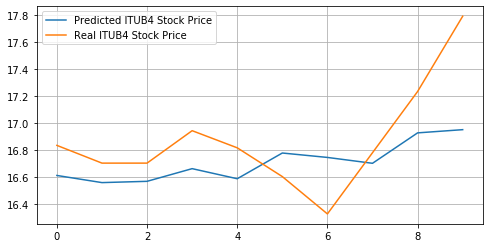

In [854]:
plt.figure(figsize=(8,4))
plt.plot(prediction6, label="Predicted ITUB4 Stock Price")
plt.plot(P_output, label = "Real ITUB4 Stock Price")
plt.grid(True)
plt.legend()

O gráfico nos mostra que o conjunto de modelos em loop consegue prever bem o comportamento do preço da ação nos primeiros 4 dias, tendo uma pequena porcentagem de erro em relação ao valor real, como mostra a célula abaixo, mas perde precisão nos dias seguintes.

In [856]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


MAPE = mean_absolute_percentage_error(prediction6,P_output)
print("Mean Absolute Percentage Error: {}%".format(MAPE))

Mean Absolute Percentage Error: 1.692322638125994%


## Segunda abordagem para tentar prever 10 dias no futuro  



Nesta iteração, usamos um modelo semelhante ao primeiro, aumentando apenas a sua complexidade e mudando ligeiramente a vetorização dos sets de treinamento.
Nesta, o código realiza o mesmo procedimento que o primeiro modelo para montar o Input, como mostra o diagrama:
![title](vectorviz.png)

Entretanto, diferentemente da primeira iteração, o código prende 10 valores no vetor de output para cada 60 valores de input


**Vetorização do Input e do Output**

In [789]:
X_train3 = []
Y_train3 = []

for i in range(60,dataset.shape[0]-10):
    X_train3.append(dataset[i-60:i])
    Y_train3.append(dataset[i:i+10])
    
    
X_train3 = np.array(X_train3)
Y_train3 = np.array(Y_train3)


print("Shape de X_train3: {}".format(X_train3.shape))
print("Shape de Y_train3: {}".format(Y_train3.shape))

Shape de X_train3: (3363, 60, 1)
Shape de Y_train3: (3363, 10, 1)


## O Modelo

O novo modelo apresenta maior complexidade, tendo mais neurônios em suas camada dense, além de uma camada Dense a mais, e mantendo a configuração das camadas LSTM.

In [792]:
model3 = tf.keras.Sequential()

model3.add(tf.keras.layers.LSTM(60,input_shape=(60,1), return_sequences=True))
model3.add(tf.keras.layers.Dropout(0.15))

model3.add(tf.keras.layers.LSTM(60,return_sequences=True))
model3.add(tf.keras.layers.Dropout(0.15))

model3.add(tf.keras.layers.LSTM(60))
model3.add(tf.keras.layers.Dropout(0.15))

model3.add(tf.keras.layers.Dense(360))

model3.add(tf.keras.layers.Dense(180))

model3.add(tf.keras.layers.Dense(60))

model3.add(tf.keras.layers.Dense(10))

adam = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)


model3.compile(optimizer=adam, loss="mean_squared_error")
model3.summary()
history3 = model3.fit(X_train3,Y_train3, epochs=50,validation_split=0.33)

Model: "sequential_104"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_273 (LSTM)              (None, 60, 60)            14880     
_________________________________________________________________
dropout_266 (Dropout)        (None, 60, 60)            0         
_________________________________________________________________
lstm_274 (LSTM)              (None, 60, 60)            29040     
_________________________________________________________________
dropout_267 (Dropout)        (None, 60, 60)            0         
_________________________________________________________________
lstm_275 (LSTM)              (None, 60)                29040     
_________________________________________________________________
dropout_268 (Dropout)        (None, 60)                0         
_________________________________________________________________
dense_230 (Dense)            (None, 360)            

**Diagnóstico do Modelo**

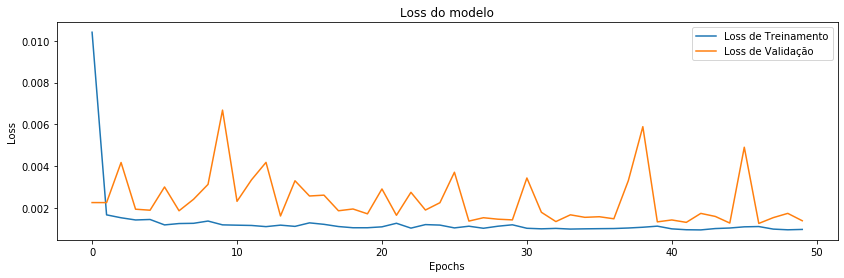

In [793]:
plt.figure(figsize=(14,4))
plt.plot(history3.history["loss"], label="Loss de Treinamento")
plt.plot(history3.history["val_loss"], label = "Loss de Validação")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


plt.title("Loss do modelo")
plt.show()

O gráfico "bagunçado" do Loss de Validação nos mostra que o modelo teve problemas em aplicar seu treinamento em um dataset que não foi utilizado em seu treinamento, o que já nos indica que o desempenho da previsão não será muito bom.

**Previsão do Valor da Ação nos Próximos 10 dias**

**Criação do Dataset**

In [794]:
p10 = web.get_data_yahoo('ITUB4.SA',start="2014-12-01",end="2015-05-01").drop(['High','Low','Open','Close','Volume'],axis=1)
p10 = scaler.fit_transform(p10)
p10.shape

(101, 1)

**Vetorização do Input de Previsão e do Output de Teste**

In [857]:
p10_x = []
p10_y = []

k_inicial = 60

p10_x.append(p10[k_inicial-60:k_inicial])
p10_y=(p10[k_inicial:k_inicial+10])
    
p10_x = np.array(p10_x)
p10_y = np.array(p10_y)

print("Shape de p10_x: {}".format(p10_x.shape))
print("Shape de p10_y: {}".format(p10_y.shape))
print(p10_y)

Shape de p10_x: (1, 60, 1)
Shape de p10_y: (10, 1)
[[0.67209699]
 [0.6311108 ]
 [0.59012783]
 [0.46717381]
 [0.35061571]
 [0.1789839 ]
 [0.32113774]
 [0.33908382]
 [0.31729987]
 [0.31729987]]


**Rodando a Previsão**

In [858]:
prediction5 = model3.predict(p10_x)
prediction5 = prediction5.reshape(10,1)
prediction5 = scaler.inverse_transform(prediction5)
p10_y = scaler.inverse_transform(p10_y)

prediction5

array([[16.625385],
       [16.587555],
       [16.589882],
       [16.624836],
       [16.634123],
       [16.636677],
       [16.63513 ],
       [16.613136],
       [16.606218],
       [16.631477]], dtype=float32)

In [859]:
p10_y.reshape(10)

array([16.63093758, 16.48553085, 16.34013557, 15.90393162, 15.49041843,
       14.88152027, 15.38583946, 15.44950676, 15.37222385, 15.37222385])

**Visualização dos Resultados**

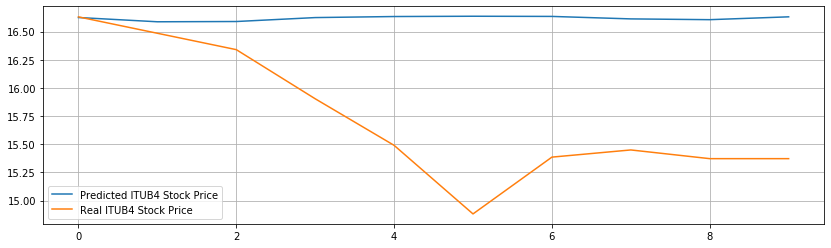

In [860]:
plt.figure(figsize=(14,4))
plt.plot(prediction5.reshape(10),label="Predicted ITUB4 Stock Price")
plt.plot(p10_y.reshape(10),label="Real ITUB4 Stock Price")
plt.legend()
plt.grid(True)
plt.show()

Com o gráfico plotado, podemos ver que o modelo realmente teve dificuldade em aprender o comportamento dos 10 dias futuros à partir da análise dos 60 dias anteriores. 

## Considerações Finais  

Analisando o Desempenho do modelo na primeira iteração, podemos concluir que modelos LSTM apresentam bom desempenho quando a tarefa é prever apenas um valor no futuro, e os inúmeros testes realizados com este modelo nos levam a crer que é possível melhorar ainda mais a precisão do modelo através de um treinamento mais intenso.  

Em relação ao segundo modelo, acreditamos que os resultados foram positivos apesar de 0 modelo errar o comportamento nos ultimos 5 dias, uma vez que os testes nos indicam que com talvez um modelo mais complexo e com um treinamento mais intenso, é possível aumentar a precisão do modelo e assim fazer com que este preveja bem 10 dias no futuro.  

O terceiro modelo, por sua vez, não apresentou bons resultados e acreditamos que a arquitetura proposta para esta tarefa não era boa e, por isso, não tentaremos seguir melhorando-o.

**Ideias para o futuro** 


**-** Uma ideia que não tivemos a oportunidade de testar, mas que com certeza tentaremos em um futuro próximo, é usar o primeiro modelo para prever um dia no futuro e então usar este output na previsão do próximo dia, repetindo este processo para tentar prever 10 ou talves mais dias no futuro e avaliar o desempenho.  

**-** Estudar novos e diferentes métodos de *Multi-Step Forecasting*, que é justamente utilizar modelos LSTM para prever multiplas unidades de tempo no futuro.



## Participação do Grupo e as Contribuições de Cada Membro

O grupo usufruiu do tempo disponibilizado em aula durante essas duas semanas para trabalhar em conjunto no projeto. Durante as aulas todos trabalharam de forma conjunta para entender a teoria por trás do modelo de rede neural e seus diferentes parâmetros. A equipe se juntou para a criação da teoria do modelo e cada membro do grupo se aprofundou em temas específicos.
	Olhando mais especificamente para o trabalho de cada um, Enrico se aprofundou mais pela parte de data transformation onde ficou responsável pela normalização dos dados para facilitar e treinamento do modelo, Murilo se aprofundou na vetorização e na criação de modelo, principalmente em decidir qual modelo se aplicaria melhor no projeto, e Roberto fez a análise descritiva do modelo e pesquisou  papers e artigos que melhor explicassem o modelo para o estudo da rede neural.  
    Quanto aos commits no Github, o grupo preferiu trabalhar em apenas um computador para desenvolver o modelo, e os textos referentes à teoria foram escritos em um Google Docs compartilhado e transferidos ao arquivo jupyter manualmente e, por isso, apenas um membro realizou commits e, mesmo assim, foram poucos, já que trabalhamos localmente e apenas realizamos os commits em datas de entregas.


